・Pythonはデータ分析に向いている言語でそのような場面で使用されることが多いです。このノートにはPythonや統計について詳しくなくてもとりあえずコピペすれば様々な場面で使用できるものを多く載せています。コードの具体的な計算方法の意味を理解するというよりも、どのコードが何の操作をしているかということをある程度理解すれば十分です。

# データの準備

・まずはグラフを作成する際に日本語タイトルを用いるためのライブラリ（モジュール）をインストールする必要があります。

In [ ]:
!pip install japanize-matplotlib

・次にダミーのデータを作成します。以下ではこのデータを利用します

In [ ]:
import pandas as pd
import numpy as np

# 学生数
num_students = 100  # 必要に応じて変更可能

# 学生番号（1000から1ずつ増加）
student_ids = np.arange(1000, 1000 + num_students)

def generate_scores(size):
    scores = np.random.randint(20, 101, size=size) # 20〜100の範囲に収める
    return scores.astype(int)  # 整数に変換

# 5科目（英, 数, 国, 理, 社）の得点データを生成
scores_data = {
    "学生番号": student_ids,
    "英語": generate_scores(num_students),
    "数学": generate_scores(num_students),
    "国語": generate_scores(num_students),
    "理科": generate_scores(num_students),
    "社会": generate_scores(num_students),
}

# データフレームの作成
df = pd.DataFrame(scores_data)

#総合得点の追加
df["総合得点"] = df.iloc[:, 1:].sum(axis=1)

# 学生番号をインデックスに設定
df.set_index("学生番号", inplace=True)

# データ表示
df.head(10)


,英語,数学,国語,理科,社会,総合得点
学生番号,,,,,,
1000,50,50,68,24,70,262
1001,54,77,47,52,25,255
1002,42,73,73,86,71,345
1003,32,56,30,20,70,208
1004,45,76,23,34,77,255
1005,53,71,27,66,82,299
1006,99,83,61,51,37,331
1007,70,33,44,55,34,236
1008,98,84,64,47,52,345


・上の表のようなものをデータフレームと言います。(コード上ではdfと書く)　データフレームの横のことを行、縦の事を列と呼びます。基本的には列に対して何かしらの操作をすることが多いです。df["列名"].メソッド(引数)の形が基本形です。このようなプログラムの形式をオブジェト指向というのですが、誰でも簡単に複雑な操作が行えます。(数学やプログラミングをあまり知らまくてもコードの暗記さえしていればいいため。どちらかといえば英語ができる人の方がコードを理解しやすいかもしれません。) 　どのコードが何をしているか分からない場合はAIに質問してみるのが１番いいです。

---



・PythonでExcelのデータを分析したい時、.xsleのファイルを.csv形式に変換して、さらにデータフレームに変換する必要があります。実験ではデータをExcelにプロットすることが多いので、Excelのデータをデータフレーム化してデータの分析を行います。特に薬学実験では統計解析や機械学習が役立つ場面は多くあるはずですので、このノートを上手く活用してみてください。

In [ ]:
#Excelファイルの読み込みとデータフレームへの変換
#今回は実行しないでok
#まずはExcelでcsvファイルとして保存を行う(Excelでファイル→保存の箇所で行います。詳しいことは省略します）
#保存先はこのGoogleColabNoteのフォルダと同じ場所にすると簡単です。

#以下csvファイルからデータフレームへの変換
import pandas as pd
df = pd.read_csv('ファイル名.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ファイル名.csv'

# 1 度数分布表、ヒストグラム、箱ひげ図

In [ ]:
#総合得点の度数分布表を作成
bins =list(range(0, 501, 50))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

freaquency_table = pd.cut(df["総合得点"], bins=bins, labels=labels, right=False).value_counts().sort_index()
df_freq = pd.DataFrame({"階級":freaquency_table.index, "度数":freaquency_table.values})
df_freq["相対度数"] = df_freq["度数"]/df_freq["度数"].sum()

df_freq

,階級,度数,相対度数
0,0-50,0,0.00
1,50-100,0,0.00
2,100-150,0,0.00
3,150-200,4,0.04
4,200-250,13,0.13
5,250-300,29,0.29
6,300-350,39,0.39
7,350-400,12,0.12
8,400-450,3,0.03
9,450-500,0,0.00


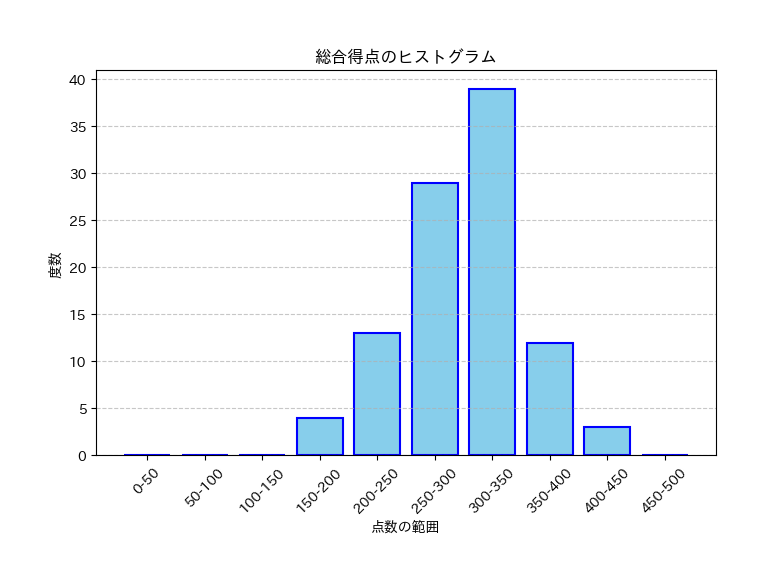

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# ヒストグラムの作成
plt.figure(figsize=(8, 5))
plt.bar(df_freq["階級"], df_freq["度数"], width=0.8, color="skyblue", edgecolor="blue", linewidth=1.5)

# ラベル
plt.xlabel("点数の範囲")
plt.ylabel("度数")
plt.title("総合得点のヒストグラム")
plt.xticks(rotation=45)  # 階級ラベルを回転して見やすく
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 表示
plt.show()

第一四分位数: 256.75
第二四分位数: 305.0
第三四分位数: 338.25


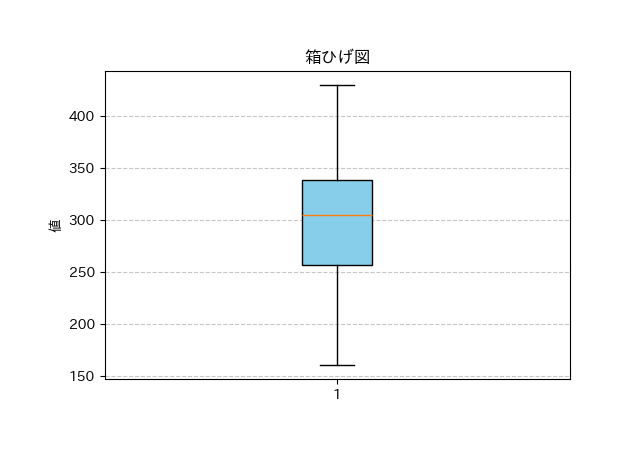

In [ ]:
# 箱ひげ図の作成
plt.figure(figsize=(6, 4))
plt.boxplot(df['総合得点'], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

# ラベル設定
plt.ylabel("値")
plt.title("箱ひげ図")
plt.grid(axis="y", linestyle="--", alpha=0.7)


#第一四分位数
q1_value = df["総合得点"].quantile(0.25)
print("第一四分位数:", q1_value)

#第二四分位数
q2_value = df["総合得点"].quantile(0.5)
print("第二四分位数:", q2_value)

#第三四分位数
q3_value = df["総合得点"].quantile(0.75)
print("第三四分位数:", q3_value)

#グラフの表示
plt.show()

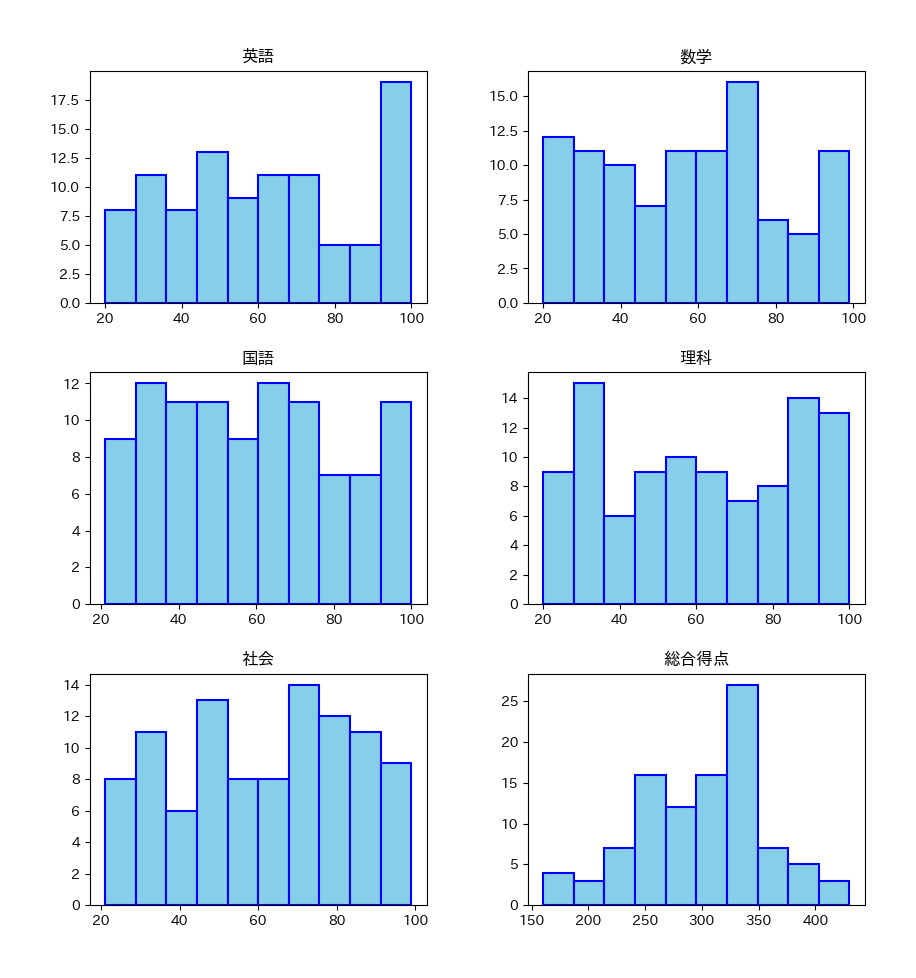

In [ ]:
#簡単に各科目の得点のヒストグラムの作成(こっちをよく使う)
df.iloc[:, 0:].hist(bins=10, figsize=(10, 6), grid=False, color="skyblue", edgecolor="blue", linewidth=1.5)

#グラフの上部にスペースを追加
plt.subplots_adjust(top=1.5)

#グラフのタイトルを設定
plt.show()

練習問題１

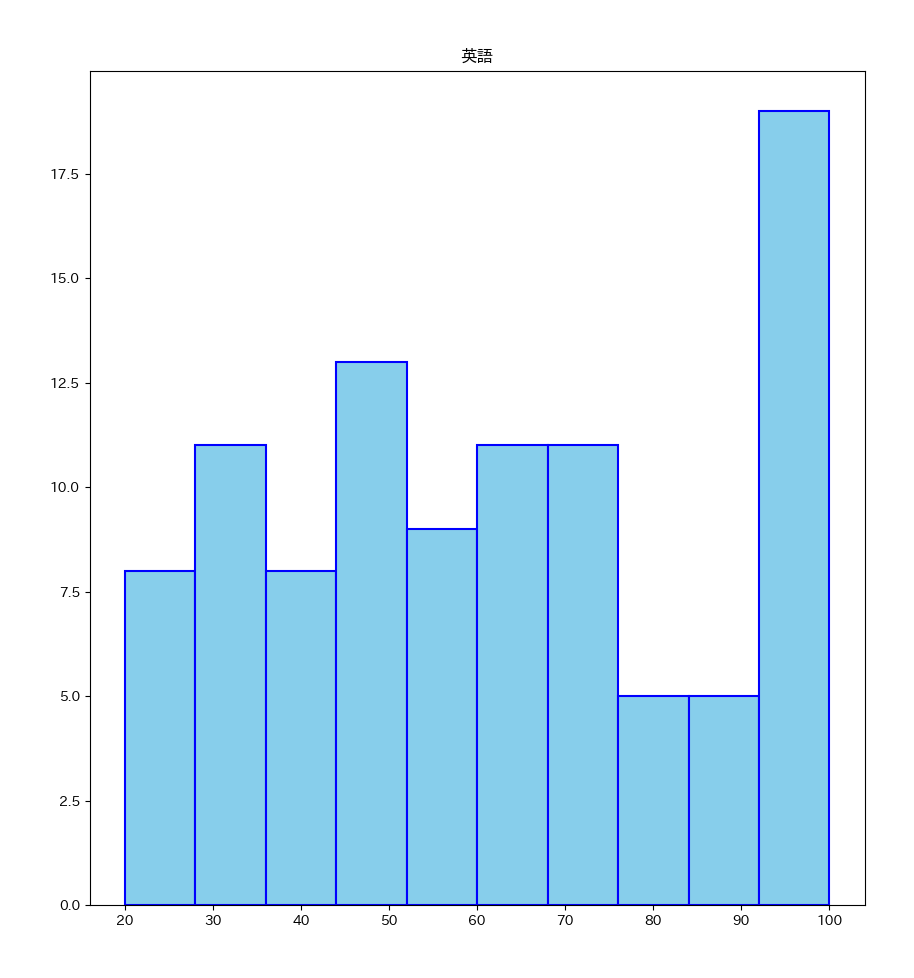

In [ ]:
#df.iloc[:,0:].hist()の部分を変更して、英語の得点だけのヒストグラムを作成しよう
#hint: .ilocは列を指定している。

df.iloc[:, 0:1].hist(bins=10, figsize=(10, 6), grid=False, color="skyblue", edgecolor="blue", linewidth=1.5)

#グラフの上部にスペースを追加
plt.subplots_adjust(top=1.5)

#グラフのタイトルを設定
plt.show()

# 2 代表値

In [ ]:
#データセットの代表値を求める

#平均
mean_value = df["総合得点"].mean()
print("平均値:", mean_value)

#中央値
median_value = df["総合得点"].median()
print("中央値:", median_value)

#最小値
min_value = df["総合得点"].min()
print("最小値:", min_value)

#最大値
max_value = df["総合得点"].max()
print("最大値:", max_value)

#範囲
range_value = max_value - min_value
print("範囲:", range_value)

#標準偏差
std_value = df["総合得点"].std()
print("標準偏差:", std_value)

#分散
var_value = df["総合得点"].var()
print("分散:", var_value)

平均値: 299.69
中央値: 305.0
最小値: 160
最大値: 430
範囲: 270
標準偏差: 55.84225527991752
分散: 3118.3574747474754


In [ ]:
#各種代表値の表を簡単に作成する方法
df.describe().T

,count,mean,std,min,25%,50%,75%,max
英語,100.0,60.94,24.292336,20.0,42.00,60.0,82.00,100.0
数学,100.0,57.50,22.874051,20.0,37.75,58.5,73.25,99.0
国語,100.0,58.94,23.075992,21.0,38.75,57.5,76.25,100.0
理科,100.0,60.58,24.554693,20.0,38.25,60.5,85.00,100.0
社会,100.0,61.73,22.604127,21.0,44.75,64.5,79.25,99.0
総合得点,100.0,299.69,55.842255,160.0,256.75,305.0,338.25,430.0


練習問題2-1

In [ ]:
#英数国理社の分散をそれぞれ求めてみよう
#以下に実装する。

var_values = df.iloc[:, 0:5].var()
print(var_values)

英語    590.117576
数学    523.222222
国語    532.501414
理科    602.932929
社会    510.946566
dtype: float64


練習問題2-2

数学と理科の相関係数: 0.15329594046266753


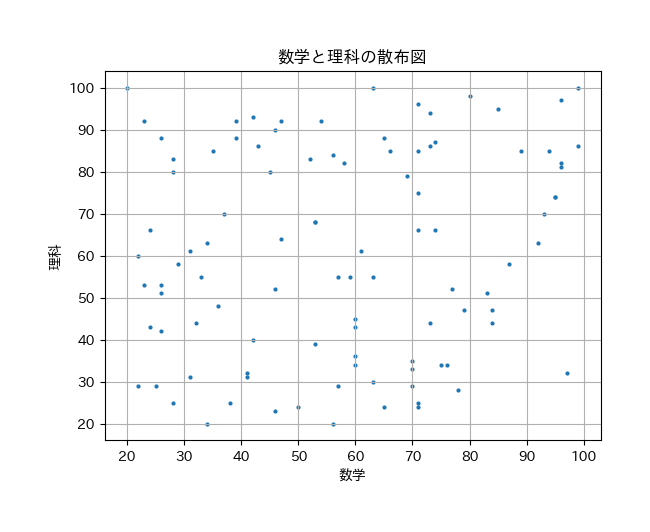

In [ ]:
#数学の得点と理科の得点の相関関係を求めてみよう。グラフも作成してみよう。
#わからないことはAIに聞いてみよう。Gemni(セルの右上星マーク)を使うと、このノート上で作成可能
#以下に実装

score_correlation = df["数学"].corr(df["理科"])
print("数学と理科の相関係数:", score_correlation)

plt.scatter(df["数学"], df["理科"])
plt.xlabel("数学")
plt.ylabel("理科")
plt.title("数学と理科の散布図")
plt.grid(True)
plt.show()

・代表値やその他の統計量といったものは機械学習の分類問題では特徴量と呼ばれます。

# 3 その他実務で使う操作


In [ ]:
#偏差値
score=367
z_score = (score - mean_value) / std_value
deviation_value = 50 + z_score * 10

print("偏差値:", f"{deviation_value:.1f}") #桁数の指定

偏差値: 62.1


In [ ]:
# 偏差値を計算する関数を作成
def calculate_deviation(score, mean, std):
    z_score = (score - mean) / std
    deviation_value = 50 + z_score * 10
    return f"{deviation_value:.1f}"

# 各データ点の偏差値を計算
df['偏差値'] = df['総合得点'].apply(lambda x: calculate_deviation(x, mean_value, std_value))

# 結果を表示
df.head(10)


,英語,数学,国語,理科,社会,総合得点,偏差値
学生番号,,,,,,,
1000,50,50,68,24,70,262,43.3
1001,54,77,47,52,25,255,42.0
1002,42,73,73,86,71,345,58.1
1003,32,56,30,20,70,208,33.6
1004,45,76,23,34,77,255,42.0
1005,53,71,27,66,82,299,49.9
1006,99,83,61,51,37,331,55.6
1007,70,33,44,55,34,236,38.6
1008,98,84,64,47,52,345,58.1


In [ ]:
#偏差値の高い順に並び替え
df_sorted = df.sort_values(by='偏差値', ascending=False)
df_sorted.head(10)

,英語,数学,国語,理科,社会,総合得点,偏差値
学生番号,,,,,,,
1072,98,99,70,100,63,430,73.3
1098,94,73,75,94,90,426,72.6
1075,96,80,72,98,58,404,68.7
1079,95,56,65,84,98,398,67.6
1011,73,66,70,85,97,391,66.4
1036,99,47,75,92,75,388,65.8
1017,72,53,95,68,90,378,64.0
1042,97,26,99,88,67,377,63.8
1039,54,95,58,74,86,367,62.1


練習問題3-1

In [ ]:
#生徒ごとに各科目と総合得点のの偏差値のデータフレームを新たに作成してみよう
#以下に実装
subject_columns = ["英語", "数学", "国語", "理科", "社会"]

dev_df = pd.DataFrame()
for subject in subject_columns:
    mean_value = df[subject].mean()
    std_value = df[subject].std()
    dev_df[f"{subject}_偏差値"] = df[subject].apply(lambda x: calculate_deviation(x, mean_value, std_value))

dev_df.head(10)

,英語_偏差値,数学_偏差値,国語_偏差値,理科_偏差値,社会_偏差値
学生番号,,,,,
1000,45.5,46.7,53.9,35.1,53.7
1001,47.1,58.5,44.8,46.5,33.8
1002,42.2,56.8,56.1,60.4,54.1
1003,38.1,49.3,37.5,33.5,53.7
1004,43.4,58.1,34.4,39.2,56.8
1005,46.7,55.9,36.2,52.2,59.0
1006,65.7,61.1,50.9,46.1,39.1
1007,53.7,39.3,43.5,47.7,37.7
1008,65.3,61.6,52.2,44.5,45.7


練習問題3-2

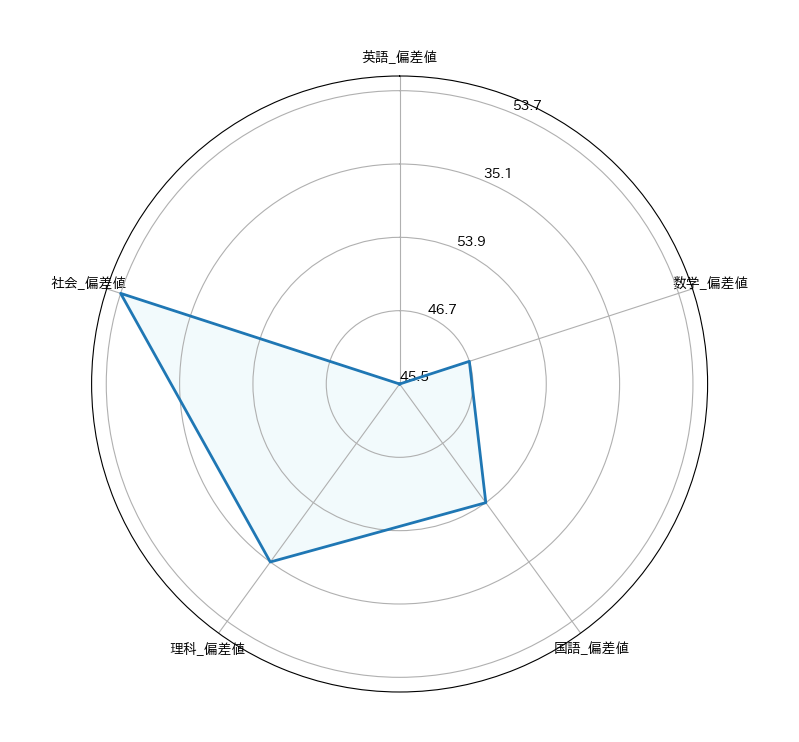

In [ ]:
#学生番号1000生徒の生徒の５科目の偏差値のレーダーチャートを作成してみよう
#以下に実装
import matplotlib.pyplot as plt
import numpy as np

#生徒番号=1000のデータフレームを新たに作成
student_data = dev_df.loc[1000]
st_df=pd.DataFrame(student_data).T
st_df.head()

# 生徒番号1000のデータ（偏差値）
labels = st_df.columns.tolist()  # 科目名
values = st_df.values.flatten()  # 偏差値データ

# 0からスタートするための設定
values = np.append(values, values[0])  # 閉じた図形にするため最初の値を追加

# 角度（各軸の位置）を計算
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 最初の角度を最後に追加して閉じた図形にする

# グラフの作成
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})
ax.set_theta_offset(np.pi / 2)  # 上を0度にする
ax.set_theta_direction(-1)  # 時計回り

# レーダーチャートの描画
ax.plot(angles, values, linewidth=2, linestyle="solid", label="生徒1000")
ax.fill(angles, values, color="skyblue", alpha=0.1)  # 塗りつぶし

# ラベルの設定
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)



# グラフの表示
plt.show()

# 4 発展(機械学習)


・簡単な機械学習を行います。機械学習を使う場面は、大きく分けて３つ。予測を行う時、分類を行う時、グループ分けしたい時です。今回は簡単な分類を行います。生徒を2科目の得点から理系、文系を分類予想するAIモデルを作成していきましょう。

・機械学習のフローチャートは1. 目的の定義, 2.データの収集と前処理, 3.適切なAIモデルの選択, 4.モデルの訓練・予測と評価, 5.結果をグラフに表示となります

2. データの前処理(文系理系の定義と、データの分割）

In [ ]:
#データフレームに文理のラベルを追加する(理系なら１、文系なら０とする)
#今回は単純に数学+理科>国語+社会なら理系とする

#実装してみよう
df["文理"]=(df["数学"]+df["理科"]>df["国語"]+df["社会"]).astype(int)

#確認
df.head(10)

,英語,数学,国語,理科,社会,総合得点,偏差値,文理
学生番号,,,,,,,,
1000,50,50,68,24,70,262,43.3,0
1001,54,77,47,52,25,255,42.0,1
1002,42,73,73,86,71,345,58.1,1
1003,32,56,30,20,70,208,33.6,0
1004,45,76,23,34,77,255,42.0,1
1005,53,71,27,66,82,299,49.9,1
1006,99,83,61,51,37,331,55.6,1
1007,70,33,44,55,34,236,38.6,1
1008,98,84,64,47,52,345,58.1,1


In [ ]:
#目的変数と説明変数に分ける
#実装してみよう(2科目選ぶ)
X = df[["理科", "国語"]]
Y = df["文理"]

In [ ]:
#訓練(train)データとテスト(test)データに分割(このような学習を教師あり学習と言います。AIに先に正解を教えておき、それを元にAIが学習する仕組みです)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

3. 適切なモデルの選択

In [ ]:
#いざ実装
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

・機械学習はpythonのsklearnというライブラリをしようすればすでに作られた学習モデルを誰でも簡単に使えます。(学習自体はこのたったの３行)目的に応じて使用するモデルを変更します。今回は分類を行う際、高い精度を出せるランダムフォレストというモデルです。

4. モデルの予測と評価

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test, y_pred)
print("正解率:", accuracy*100, "%")

正解率: 85.0 %


・ここで、正解率が低い場合は上の目的変数の選択が適切でないので、他の科目に変えていろいろ試してみよう。50％は越すようにしてください

5. 結果の表示

混同行列:


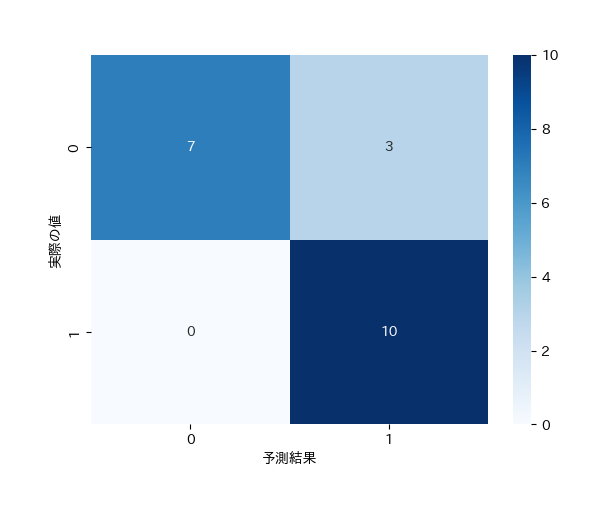

分類指標:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [ ]:
#混同行列の作成
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, y_pred)
print("混同行列:")
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('予測結果')
plt.ylabel('実際の値')
plt.show()

#各指標のレポート。
print("分類指標:")
print(classification_report(Y_test, y_pred))



混同行列とはモデルの正確性を表しています。以下に用語の説明を行います

・precision・・・適合率(正と判定した結果のうち、実際に真の値と一致しているかを表す)

・recall・・・再現率(実際に正であるものの中から、どれだけ正と予測できたかを表す。)

・f１-score・・・precisionとrecallの調和平均。モデルの正確性を表す

・support・・・判定された数

練習問題4

In [ ]:
#作成したAIモデルを用いて生徒の理系文系判定を行なってみよう


# 1. 新しい生徒の得点データを入力（英語, 数学, 国語, 理科, 社会から目的変数として利用したものをデータフレームにする）
scores_data = {
    "理科": [59],
    "国語": [40],
}

score_df=pd.DataFrame(scores_data)


# 2. 予測（学習済みモデルを使用）
#以下実装
predicted_label = model.predict(score_df)

# 3. 結果の表示
#以下実装
result = "理系" if predicted_label == 1 else "文系"
print(f"この生徒の判定結果: {result}")

この生徒の判定結果: 理系
